In [1]:
#Import libraries

from sklearn import metrics
import pandas as pd
import numpy as np
from pyparsing import col
from requests import head
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from torch import rand
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read in data 

#User data
df = pd.read_csv('udata.txt', sep='\t', header=None)
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']

#Users
users = pd.read_csv('uuser.txt', sep='|', header=None)
users.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']

#genre data
genre = pd.read_csv('ugenre.txt', sep='|', header=None)
genre.columns = ['genre', 'genre_id']

#occupation data
job = pd.read_csv('uoccupation.txt', sep='|', header=None)
job.columns = ['occupation']
job = job.reset_index().rename(columns={'index': 'job'})

#other items
items = pd.read_csv('uitem.txt', sep='|', header=None)
items.columns = ['movie_id', 'movie_title', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

In [46]:
#Combine/clean data

data = df.merge(users, how='left', on = 'user_id').merge(job, how = 'left', on='occupation').merge(items, how='left', left_on='item_id', right_on='movie_id')
data[data.Western.isna()]
data = data[data.Western.notna()].astype({'Western': 'int'})
data.gender.unique()
data['gender_id'] = np.where(data.gender == 'M', 0, 1)



In [32]:
# for splitting and training

#features = ['rating', 'age', 'gender_id', 'job', 'unknown', 'Action', 'Adventure', 'Animation','Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi', 'Thriller', 'War', 'Western']

#data_x = data[features].drop(columns=['rating'])
#data_y = data[['rating']]

#train_x, train_y, test_x, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state=123
data.columns


Index(['user_id', 'item_id', 'rating', 'timestamp', 'age', 'gender',
       'occupation', 'zip_code', 'job', 'movie_id', 'movie_title',
       'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci_Fi', 'Thriller', 'War', 'Western', 'gender_id'],
      dtype='object')

Text(0.5, 1.0, 'Rating Distribution')

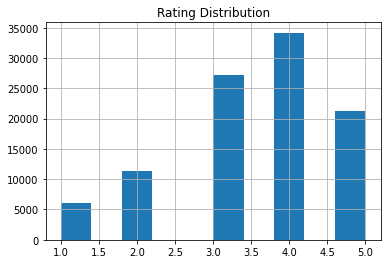

In [37]:
data.hist(column = 'rating')
plt.title("Rating Distribution")

In [47]:
#Convert to long format data for genre

data = pd.melt(data, id_vars = ['user_id', 'item_id', 'rating', 'timestamp', 'age', 'gender',
                        'occupation', 'zip_code', 'job', 'movie_id', 'movie_title','video_release_date', 'imdb_url',
                               'gender_id'],
        var_name = "genre",
       value_name = "values")
data = data.loc[data['values'] == 1]
data = data.drop("values", 1)

,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code,job,movie_id,movie_title,video_release_date,imdb_url,gender_id,genre
0,196,242,3,881250949,49,M,writer,55105,20,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,unknown
1,186,302,3,891717742,39,F,executive,00000,6,302,L.A. Confidential (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,1,unknown
2,22,377,1,878887116,25,M,writer,40206,20,377,Heavyweights (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Heavyweights%...,0,unknown
3,244,51,2,880606923,28,M,technician,80525,19,51,Legends of the Fall (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?Legends%20of%...,0,unknown
4,166,346,1,886397596,47,M,educator,55113,3,346,Jackie Brown (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899824,880,476,3,880175444,13,M,student,83702,18,476,"First Wives Club, The (1996)",14-Sep-1996,http://us.imdb.com/M/title-exact?First%20Wives...,0,Western
1899825,716,204,5,879795543,36,F,administrator,44265,0,204,Back to the Future (1985),01-Jan-1985,http://us.imdb.com/M/title-exact?Back%20to%20t...,1,Western
1899826,276,1090,1,874795795,21,M,student,95064,18,1090,Sliver (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Sliver%20(1993),0,Western
1899827,13,225,2,882399156,47,M,educator,29206,3,225,101 Dalmatians (1996),27-Nov-1996,http://us.imdb.com/M/title-exact?101%20Dalmati...,0,Western
